# EDA for Global Terrorism between 1970 - 2017

In [113]:
import pandas as pd
import numpy as np
from plotnine import *
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline

In [2]:
pwd

'C:\\Users\\munsu\\dataquest\\python'

In [3]:
terror = pd.read_csv("terror.csv", encoding = 'ISO-8859-1')

In [4]:
terror.shape

(181691, 135)

In [5]:
# We have 135 columns and 181691 rows
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
# lets find out the columns with missing values
terror.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [7]:
terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [8]:
# let's trim down columns for the columns we want to investigate
terror = terror[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude','success','suicide', 'attacktype1_txt','targtype1_txt','targsubtype1_txt','target1','natlty1_txt','gname','gsubname','nperps','weaptype1_txt','nkill','nkillus']]

In [9]:
months = terror['imonth'].value_counts()

In [10]:
terror = terror[terror.imonth != 0]

In [11]:
terror['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: imonth, dtype: int64

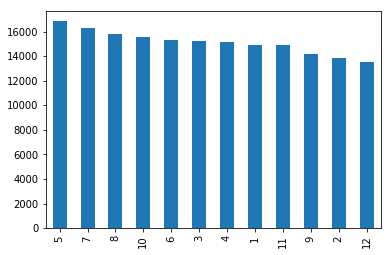

In [12]:
# which months does terror occur the most?
terror['imonth'].value_counts(sort=True).plot.bar()
#terror occus most in May and less in December

In [13]:
terror['iday'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      871
Name: iday, dtype: int64

In [14]:
# combine year and months to one variable to group them by year and month
terror['date'] = pd.to_datetime(terror['iyear'].apply(str) + '-' + terror['imonth'].apply(str))

In [15]:
terror['date'].head()

0   1970-07-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
Name: date, dtype: datetime64[ns]

In [16]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181671 entries, 0 to 181690
Data columns (total 23 columns):
iyear               181671 non-null int64
imonth              181671 non-null int64
iday                181671 non-null int64
extended            181671 non-null int64
country_txt         181671 non-null object
region_txt          181671 non-null object
city                181237 non-null object
latitude            177119 non-null float64
longitude           177118 non-null float64
success             181671 non-null int64
suicide             181671 non-null int64
attacktype1_txt     181671 non-null object
targtype1_txt       181671 non-null object
targsubtype1_txt    171299 non-null object
target1             181036 non-null object
natlty1_txt         180112 non-null object
gname               181671 non-null object
gsubname            5889 non-null object
nperps              110575 non-null float64
weaptype1_txt       181671 non-null object
nkill               171369 non-nul

In [17]:
terror.isnull().sum()

iyear                    0
imonth                   0
iday                     0
extended                 0
country_txt              0
region_txt               0
city                   434
latitude              4552
longitude             4553
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10372
target1                635
natlty1_txt           1559
gname                    0
gsubname            175782
nperps               71096
weaptype1_txt            0
nkill                10302
nkillus              64427
date                     0
dtype: int64

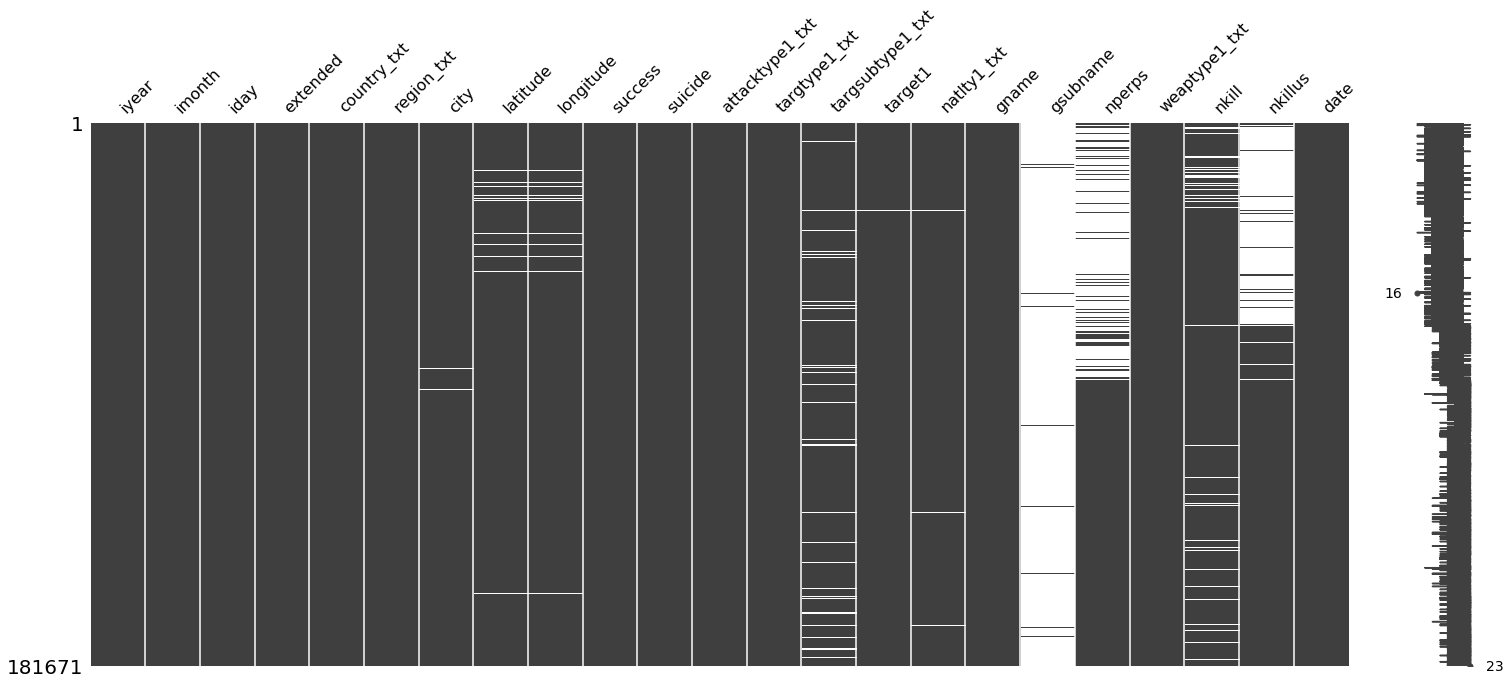

In [18]:
import missingno as msno

msno.matrix(terror)

In [19]:
terror['date'].head()

0   1970-07-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
Name: date, dtype: datetime64[ns]

In [20]:
group_month = terror.groupby('date')

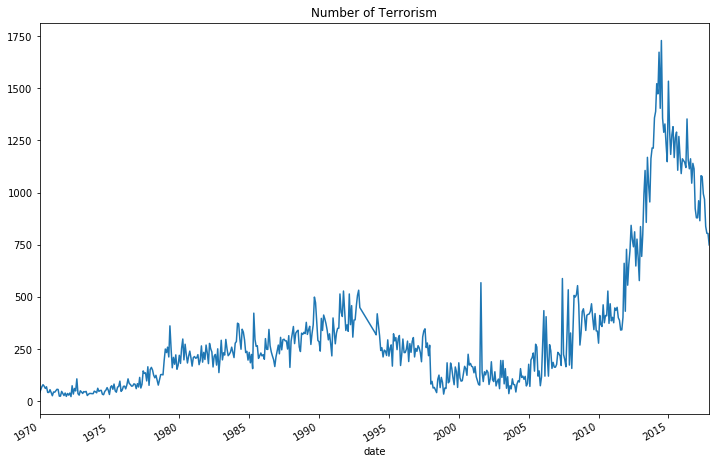

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('date').count()['success'].plot(ax=ax,title = 'Number of Terrorism')

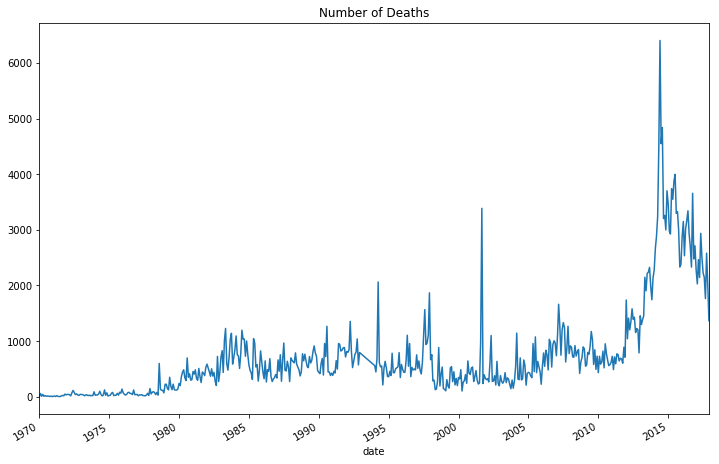

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('date').sum()['nkill'].plot(ax=ax, title= 'Number of Deaths')

The number of deaths increased over the years and it spiked up as it was entering for 2015.


Number of deaths are correlated with the number of terrorism.

In [23]:
confirm911 = terror[(terror['date'] > '2000-01-01') & (terror['date'] <'2003-01-01')]

In [24]:
confirm911[confirm911['nkill'] == max(confirm911['nkill'])]

iyear  imonth  iday  extended    country_txt     region_txt  \
73126   2001       9    11         0  United States  North America   

                city   latitude  longitude  success  suicide attacktype1_txt  \
73126  New York City  40.697132 -73.931351        1        1       Hijacking   

                     targtype1_txt              targsubtype1_txt  \
73126  Private Citizens & Property  Unnamed Civilian/Unspecified   

                                                 target1    natlty1_txt  \
73126  Passengers and crew members on American Airlin...  United States   

          gname gsubname  nperps  \
73126  Al-Qaida      NaN     5.0   

                                           weaptype1_txt   nkill  nkillus  \
73126  Vehicle (not to include vehicle-borne explosiv...  1384.0   1360.0   

            date  
73126 2001-09-01

The spike between 2000 & 2005 is the year of 2011 when 911 terror happened.

Where does the most terrorism occur in the world?

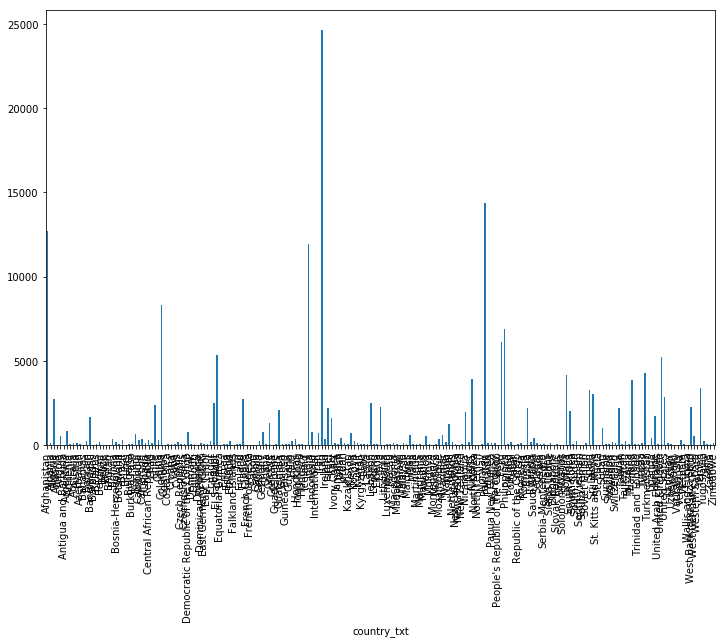

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('country_txt').count()['success'].plot.bar(ax=ax)

In [26]:
terror.groupby('country_txt').count()['success'].sort_values(ascending=False)
#It's very hard to tell the countries and coressponding values. Let's look at with Table:
#1) Iraq has the most terrorism incidents around the globe
#2) N. Korea only had one terrorism. It makes sense as government controls the whole system and also even if there were any terrorism, N. Korea will not report to the public.

country_txt
Iraq                                24636
Pakistan                            14367
Afghanistan                         12731
India                               11960
Colombia                             8304
Philippines                          6906
Peru                                 6096
El Salvador                          5319
United Kingdom                       5235
Turkey                               4290
Somalia                              4142
Nigeria                              3907
Thailand                             3849
Yemen                                3347
Spain                                3249
Sri Lanka                            3021
United States                        2836
Algeria                              2743
France                               2690
Egypt                                2479
Lebanon                              2478
Chile                                2365
Libya                                2249
West Bank and Gaza Str

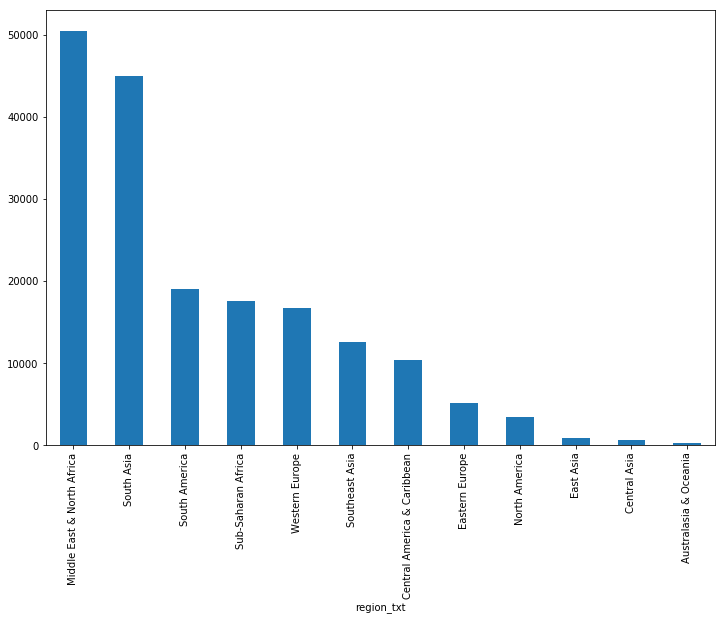

In [27]:
# Since the countries are grouped by the regions, let's group them by region and find which regions have the most and the least terrorism

fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('region_txt').count()['success'].sort_values(ascending=False).plot.bar(ax=ax)

Middle East & North Africa has the most terrorism and Asitralasia & Oceania has the least.

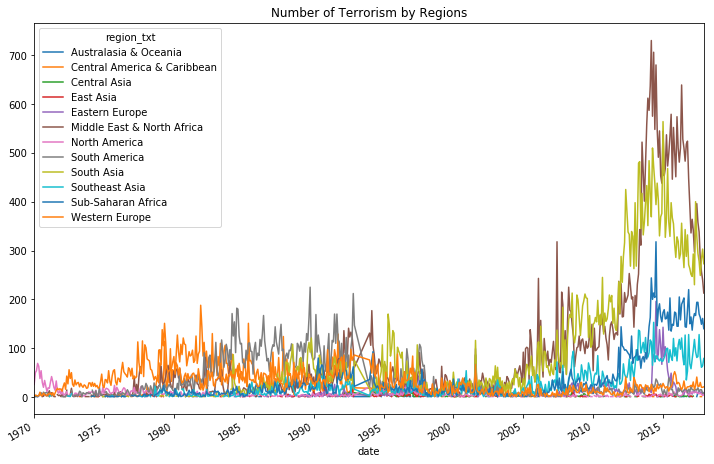

In [38]:
# Let's take a look at regions with the timeline
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby(['date','region_txt']).count()['success'].unstack().plot(ax=ax, title = "Number of Terrorism by Regions")

Middle East terrorism spiked after 2005 where there are still ongoing war in that region.

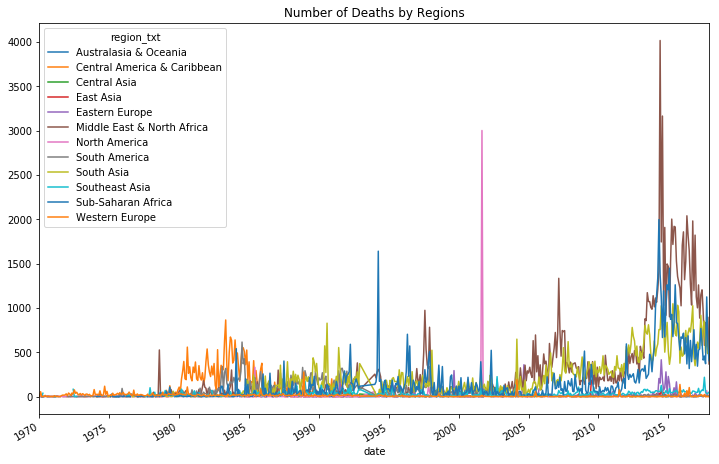

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby(['date','region_txt']).sum()['nkill'].unstack().plot(ax=ax, title = "Number of Deaths by Regions")

Middle East and North Africa region is the region with the high number of terrorisms most recently  
Then what types of weapons were used to carry out these attacks?  
Let's take a look at top 3 and bottom 3.

In [30]:
Region = terror.groupby('region_txt')
No1MiddleEast = Region.get_group("Middle East & North Africa")
No2SouthAsia = Region.get_group("South Asia")
No3SouthAmerica = Region.get_group("South America")
Bottom1AusOce = Region.get_group("Australasia & Oceania")
Bottom2CentralAsia = Region.get_group("Central Asia")
Bottom3EastAsia = Region.get_group("East Asia")

In [31]:
No1to3 = pd.concat([No1MiddleEast,No2SouthAsia,No3SouthAmerica])
No1to3.head(1)
Bottom1to3 = pd.concat([Bottom1AusOce,Bottom2CentralAsia,Bottom3EastAsia])

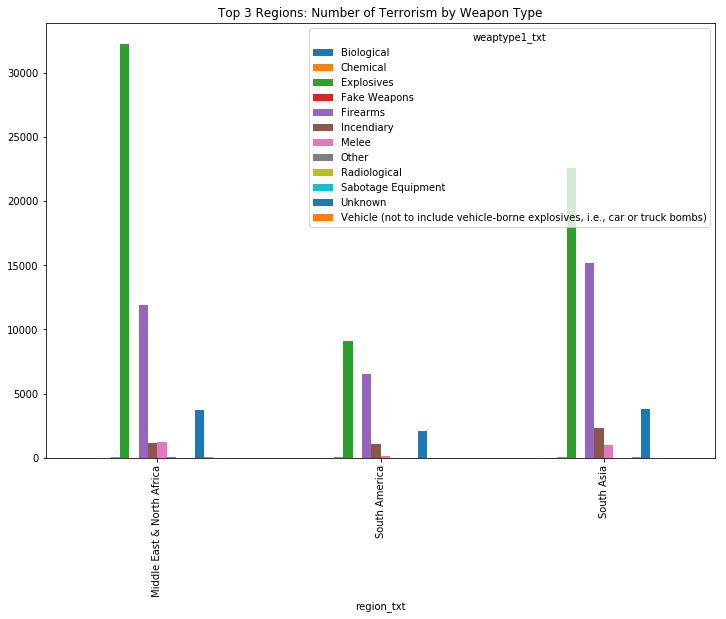

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
No1to3.groupby(['region_txt','weaptype1_txt']).count()['success'].unstack().plot.bar(ax=ax, title = "Top 3 Regions: Number of Terrorism by Weapon Type")

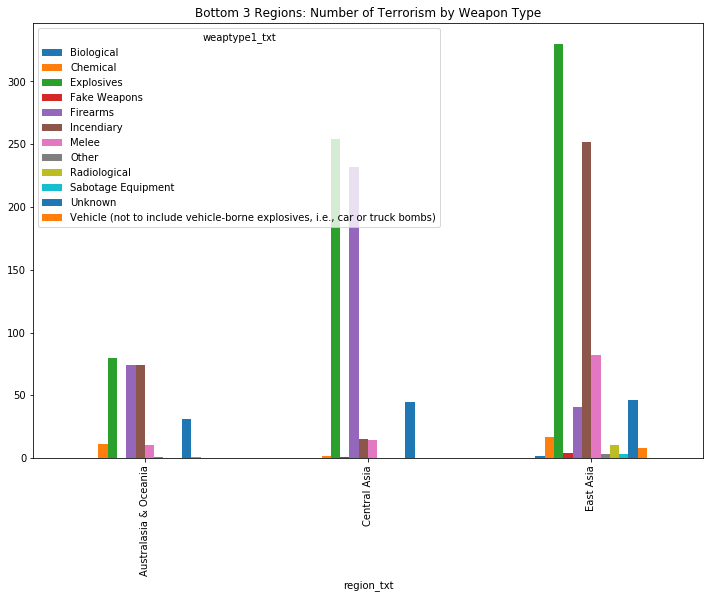

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
Bottom1to3.groupby(['region_txt','weaptype1_txt']).count()['success'].unstack().plot.bar(ax=ax, title = "Bottom 3 Regions: Number of Terrorism by Weapon Type")

The number one terrorism by top 3 and bottom 3 regions are Explosives.  
The second terrorism by both tiers are firearms except East Asia. The reason is that most of East Asia forbid individuals to carry guns.  
On the contrary, incendiary[(of a device or attack) designed to cause fires] is the second terrorism in East Asia.  

Also, the number of terrorism is not comparable. East Asia's explosive terrorism is around 350 when Middle East & North Africa's explosive terrorism is around 35000. It's approximately 100 times more.

In [34]:
a = No1to3[No1to3['weaptype1_txt'] == 'Explosives']['success'].count() # Number of Explosive Success Terrorism in Top 3
b = Bottom1to3[Bottom1to3['weaptype1_txt'] == 'Explosives']['success'].count() # Number of Explosive Success Terrorism in Bottom 3

In [35]:
terror.head(1)

iyear  imonth  iday  extended         country_txt  \
0   1970       7     2         0  Dominican Republic   

                    region_txt           city   latitude  longitude  success  \
0  Central America & Caribbean  Santo Domingo  18.456792 -69.951164        1   

   suicide attacktype1_txt                targtype1_txt targsubtype1_txt  \
0        0   Assassination  Private Citizens & Property   Named Civilian   

        target1         natlty1_txt   gname gsubname  nperps weaptype1_txt  \
0  Julio Guzman  Dominican Republic  MANO-D      NaN     NaN       Unknown   

   nkill  nkillus       date  
0    1.0      NaN 1970-07-01

In [64]:
import folium
from folium.plugins import MarkerCluster

In [39]:
terror['latitude'].dropna(inplace = True)

In [40]:
terror['longitude'].dropna(inplace = True)

In [41]:
terror[['latitude','longitude']].isnull().sum()

latitude     4552
longitude    4553
dtype: int64

In [46]:
#terror['latitude'].notnull()
terror.dropna(subset=['latitude'], how='all',inplace= True)

In [47]:
terror[['latitude','longitude']].isnull().sum()

latitude     0
longitude    1
dtype: int64

In [48]:
terror.dropna(subset=['longitude'], how='all',inplace= True)

In [49]:
terror[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [75]:
terror_map1 = folium.Map(location = [terror["latitude"].mean(), terror['longitude'].mean()], zoom_start= 4)
mc = MarkerCluster()

for n in terror.itertuples():
    mc.add_child(folium.Marker(location=[n.latitude, n.longitude],
                  popup =n.attacktype1_txt))

terror_map1.add_child(mc)
terror_map1.save('C:/Users/munsu/dataquest/python/terror_map1.html')

# Data is too big to display on the folium map. Let's look at with bottom 3 regions

KeyboardInterrupt: 

In [56]:
Bottom1to3.dropna(subset=['latitude','longitude'], how='all',inplace= True)

In [57]:
Bottom1to3[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [73]:
terror_map = folium.Map(location = [Bottom1to3["latitude"].mean(), Bottom1to3['longitude'].mean()], zoom_start= 4)
mc = MarkerCluster()

for n in Bottom1to3.itertuples():
    mc.add_child(folium.Marker(location=[n.latitude, n.longitude],
                  popup =n.attacktype1_txt))

terror_map.add_child(mc)
terror_map.save('C:/Users/munsu/dataquest/python/terror_map.html')

In this dataset, there are success and suicde. Let's look at the percentage of suicidal terrorism success rate.

In [86]:
print((terror['suicide']!=0).sum())
print((terror['success']!=0).sum())

6607
157293


In [99]:
#total percentage of suicidal attack
totalsuicidalatk = ((terror['suicide']!=0).sum())/(len(terror['success']))
round(totalsuicidalatk *100,2)
# Globally, 3.73% of terrorism occured by taking his life with victims.

3.73

In [110]:
#success rate of suicidal attack
suicidalsuccess = ((suicideattack['success']==1).sum())/len(suicideattack['success'])

In [114]:
suicidalrate = round(suicideattack['success'].value_counts() / len(suicideattack['success'])*100,2)

labels = list(suicidalrate.index)
values = list(suicidalrate.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Success Rate of Suicidal Attack', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

"1" represents success of terrorism and "0" represent failed sucidal attak.  
In the above pie diagram, 84% attacks are successful. Then, for 16%, in which countries the terror attempt failed? 

In [122]:
suicidalatk = terror[terror['suicide']!=0]

In [123]:
failedsuicidalatk = suicidalatk[suicidalatk['success']==0]

In [131]:
failedsuicidalatk.region_txt.value_counts()

Middle East & North Africa    664
South Asia                    290
Sub-Saharan Africa             89
Eastern Europe                  7
Southeast Asia                  3
Western Europe                  3
Central Asia                    1
East Asia                       1
North America                   1
Australasia & Oceania           1
Name: region_txt, dtype: int64

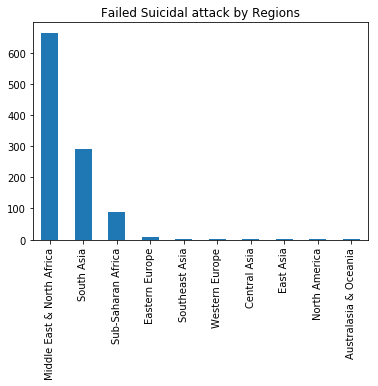

In [136]:
failedsuicidalatk.region_txt.value_counts().plot.bar(title="Failed Suicidal attack by Regions")

The first two correlates with the highest number of terrorism figure by the regions. It makes sense as they consists of non-comparabl  terrorism attempts with other regions, then for surely, there are terrorism that also failed.  Surpringly, South America does not have any data on failed suicidal attacks. Either the data is missing for South America or they are 99.9% successful with the suicidal attacks.

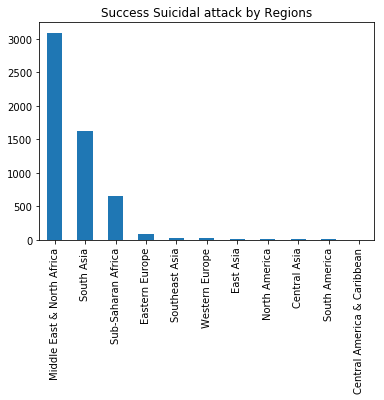

In [137]:
successsuicidalatk = suicidalatk[suicidalatk['success']==1]
successsuicidalatk.region_txt.value_counts().plot.bar(title="Success Suicidal attack by Regions")

Not surpringly, the top three sucess suicidal attacks by regions are the regions with the highest top 3 terrorism around the globe.

# Then who are the targets?

In [138]:
terror.head(1)

iyear  imonth  iday  extended         country_txt  \
0   1970       7     2         0  Dominican Republic   

                    region_txt           city   latitude  longitude  success  \
0  Central America & Caribbean  Santo Domingo  18.456792 -69.951164        1   

   suicide attacktype1_txt                targtype1_txt targsubtype1_txt  \
0        0   Assassination  Private Citizens & Property   Named Civilian   

        target1         natlty1_txt   gname gsubname  nperps weaptype1_txt  \
0  Julio Guzman  Dominican Republic  MANO-D      NaN     NaN       Unknown   

   nkill  nkillus       date  
0    1.0      NaN 1970-07-01

In [140]:
terror['targtype1_txt'].value_counts()

Private Citizens & Property       42567
Military                          26891
Police                            24140
Government (General)              20809
Business                          20270
Transportation                     6550
Unknown                            5831
Utilities                          5552
Religious Figures/Institutions     4382
Educational Institution            4267
Government (Diplomatic)            3513
Terrorists/Non-State Militia       2972
Journalists & Media                2853
Violent Political Party            1839
Airports & Aircraft                1307
Telecommunication                   996
NGO                                 942
Tourists                            422
Maritime                            314
Food or Water Supply                301
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [143]:
targettype = round(terror['targtype1_txt'].value_counts() / len(terror['targtype1_txt'])*100,2)
labels = list(targettype.index)
values = list(targettype.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Targets Category', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [148]:
terror['targsubtype1_txt'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11395
Police Security Forces/Officers                            11003
Military Personnel (soldiers, troops, officers, forces)     7825
Military Unit/Patrol/Convoy                                 7621
Government Personnel (excluding police, military)           6477
Village/City/Town/Suburb                                    6264
Politician or Political Party Movement/Meeting/Rally        6122
Police Building (headquarters, station, school)             5826
Military Barracks/Base/Headquarters/Checkpost               5078
Police Patrol (including vehicles and convoys)              5016
Name: targsubtype1_txt, dtype: int64

In [150]:
targetsubtype =  round(terror['targsubtype1_txt'].value_counts() / len(terror['targsubtype1_txt'])*100,2)
targetsubtype.head(10)

Unnamed Civilian/Unspecified                               6.43
Police Security Forces/Officers                            6.21
Military Personnel (soldiers, troops, officers, forces)    4.42
Military Unit/Patrol/Convoy                                4.30
Government Personnel (excluding police, military)          3.66
Village/City/Town/Suburb                                   3.54
Politician or Political Party Movement/Meeting/Rally       3.46
Police Building (headquarters, station, school)            3.29
Military Barracks/Base/Headquarters/Checkpost              2.87
Police Patrol (including vehicles and convoys)             2.83
Name: targsubtype1_txt, dtype: float64

In the above findings, many innocent civilians died and individuals working for the government especially police officers and soldiers.